In [62]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
df = pd.read_csv("cars.csv")

In [64]:
data=df.copy()

In [65]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [66]:
df.shape

(10000, 10)

In [67]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [69]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [70]:
df.duplicated().sum()

0

### EDA

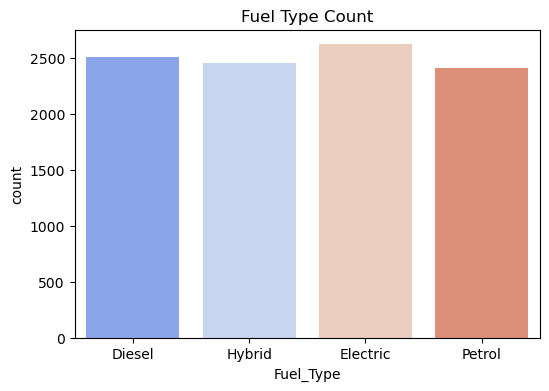

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fuel_Type", palette="coolwarm")
plt.title("Fuel Type Count")
plt.show()

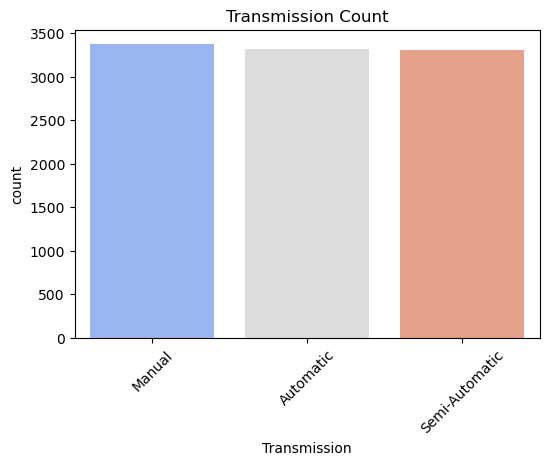

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Transmission", palette="coolwarm")
plt.title("Transmission Count")
plt.xticks(rotation=45)
plt.show()

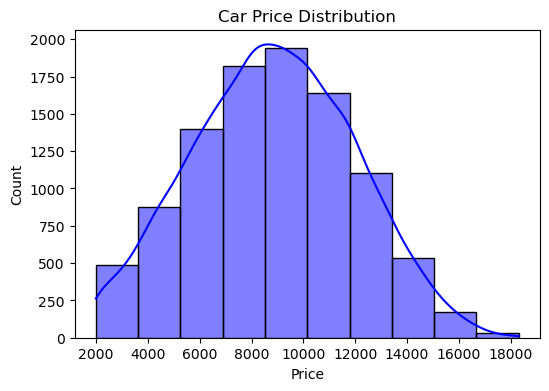

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], bins=10, kde=True, color="blue")
plt.title("Car Price Distribution")
plt.show()

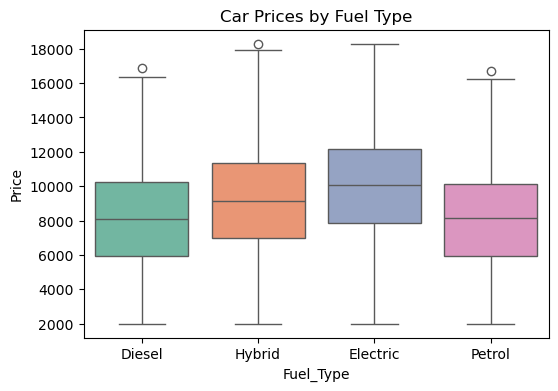

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Fuel_Type", y="Price", data=df, palette="Set2")
plt.title("Car Prices by Fuel Type")
plt.show()

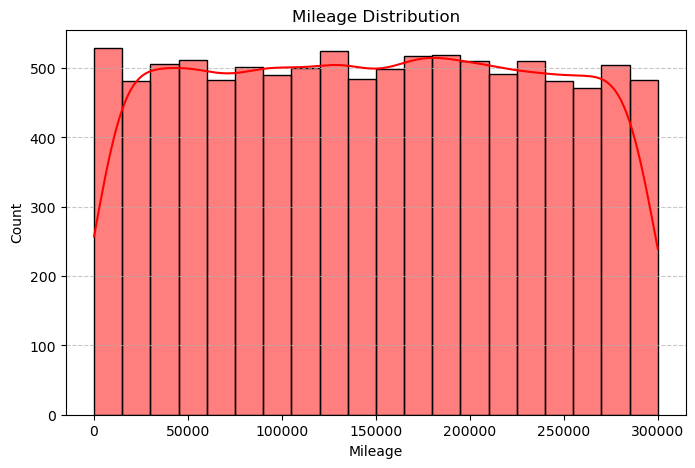

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage"], bins=20, kde=True, color="red")
plt.title("Mileage Distribution")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


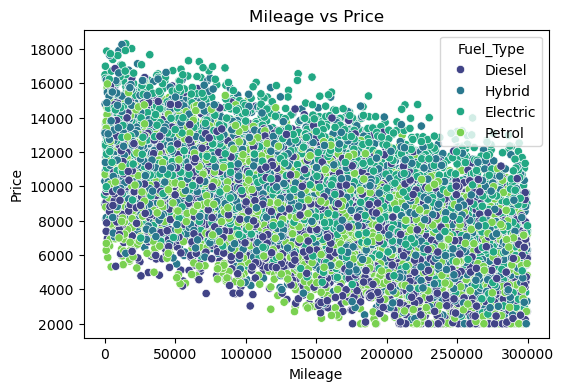

In [77]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Mileage", y="Price", data=df, hue="Fuel_Type", palette="viridis")
plt.title("Mileage vs Price")
plt.show()

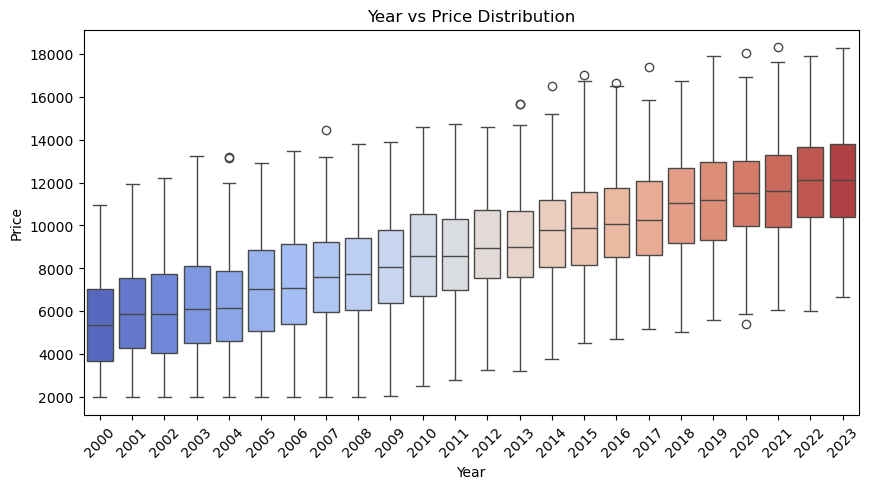

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Year", y="Price", data=df, palette="coolwarm")
plt.title("Year vs Price Distribution")
plt.xticks(rotation=45)
plt.show()

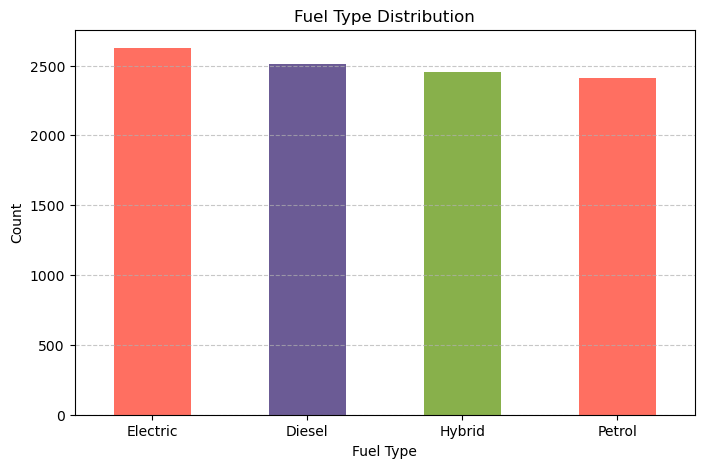

In [79]:
plt.figure(figsize=(8,5))
df["Fuel_Type"].value_counts().plot(kind="bar", color=["#FF6F61", "#6B5B95", "#88B04B"])
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

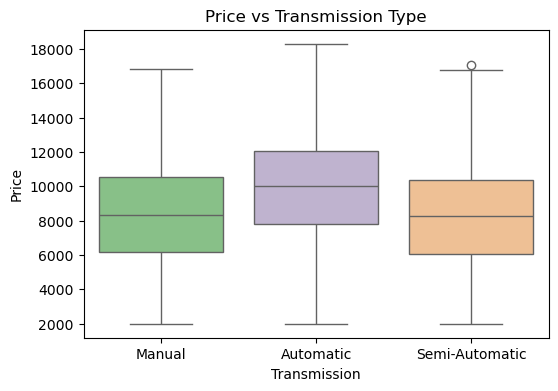

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Accent")
plt.title("Price vs Transmission Type")
plt.show()

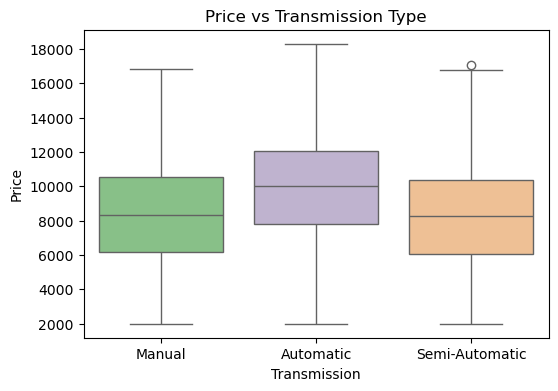

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Accent")
plt.title("Price vs Transmission Type")
plt.show()

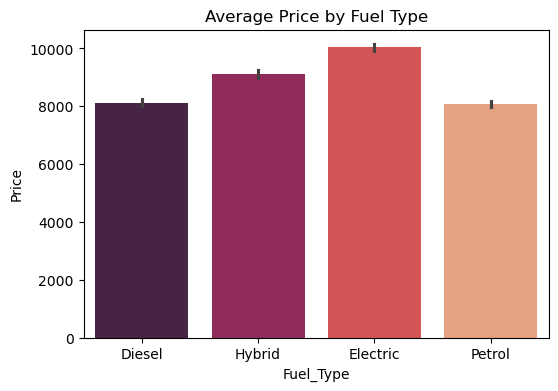

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(x="Fuel_Type", y="Price", data=df, palette="rocket")
plt.title("Average Price by Fuel Type")
plt.show()

In [103]:
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]

In [105]:
label_encoders = {}

In [107]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  

In [109]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


In [111]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor()
}

In [121]:
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, mse, rmse, mae])
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}")

Training Linear Regression...
Linear Regression: R² = 0.9109, MSE = 818588.25, RMSE = 904.76, MAE = 793.48
Training Decision Tree...
Decision Tree: R² = 0.9320, MSE = 624730.69, RMSE = 790.40, MAE = 596.99
Training Random Forest...
Random Forest: R² = 0.9759, MSE = 221709.70, RMSE = 470.86, MAE = 372.94
Training XGBoost...
XGBoost: R² = 0.9935, MSE = 59902.03, RMSE = 244.75, MAE = 195.13


In [123]:
results_df = pd.DataFrame(results, columns=["Model", "R²", "MSE", "RMSE", "MAE"])

In [125]:
results_df = results_df.sort_values(by="R²", ascending=False)
print("\n Model Performance:\n", results_df)


 Model Performance:
                Model        R²            MSE        RMSE         MAE
3            XGBoost  0.993480   59902.025217  244.748902  195.126472
2      Random Forest  0.975869  221709.697849  470.860593  372.942690
1      Decision Tree  0.932004  624730.693500  790.399072  596.990500
0  Linear Regression  0.910905  818588.252890  904.758671  793.477135


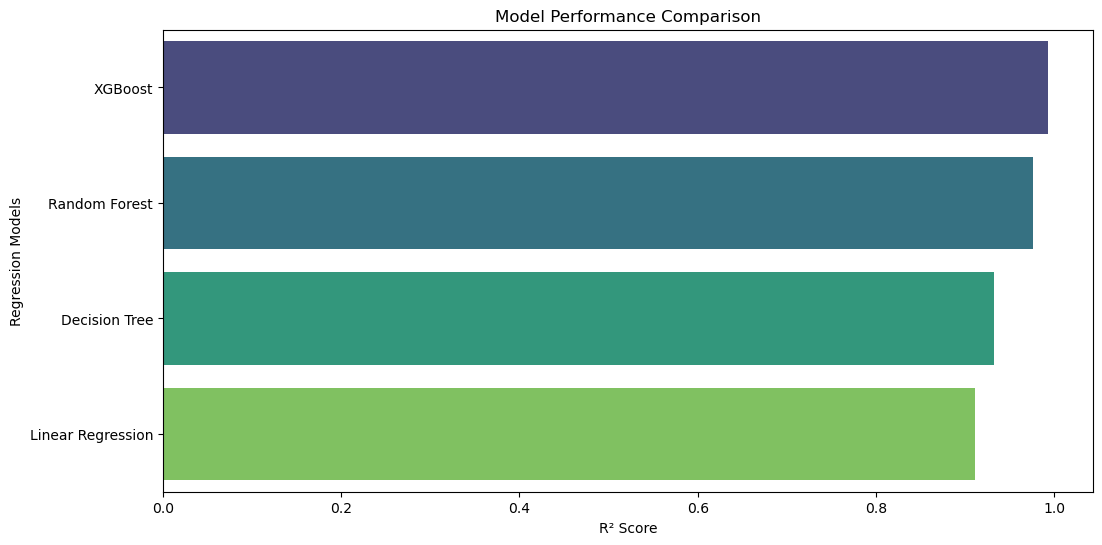

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(x="R²", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("R² Score")
plt.ylabel("Regression Models")
plt.show()

In [129]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

In [131]:
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [139]:
from sklearn.model_selection import GridSearchCV
rf_best = tune_model(RandomForestRegressor(), param_grid_rf, X_train, y_train)
xgb_best = tune_model(XGBRegressor(), param_grid_xgb, X_train, y_train)

Best Parameters for RandomForestRegressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [141]:
tuned_models = {"Random Forest": rf_best, "XGBoost": xgb_best}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Tuned R² Score: {r2:.4f}")

Random Forest Tuned R² Score: 0.9763
XGBoost Tuned R² Score: 0.9976


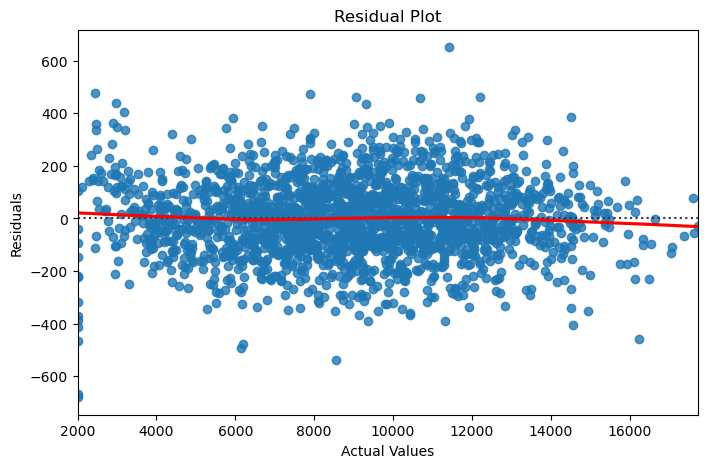

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

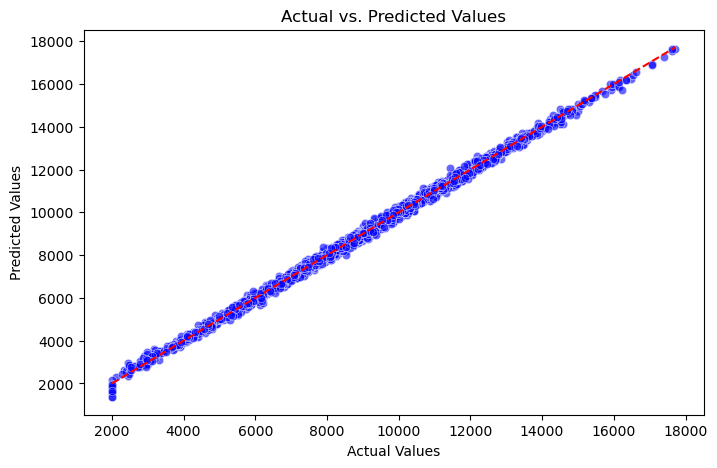

In [155]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [143]:
import pickle

# Save the tuned XGBoost model
with open("xgb_best.pkl", "wb") as file:
    pickle.dump(xgb_best, file)

print("Tuned XGBoost model saved as xgb_best.pkl")


Tuned XGBoost model saved as xgb_best.pkl


In [145]:
# Load the saved XGBoost model
with open("xgb_best.pkl", "rb") as file:
    loaded_xgb_model = pickle.load(file)

# Use the loaded model for prediction
y_pred_loaded = loaded_xgb_model.predict(X_test)


In [147]:
print("Predicted values:", y_pred_loaded[:5])


Predicted values: [ 1721.199  11053.546  14553.322   7278.1196 10109.883 ]
